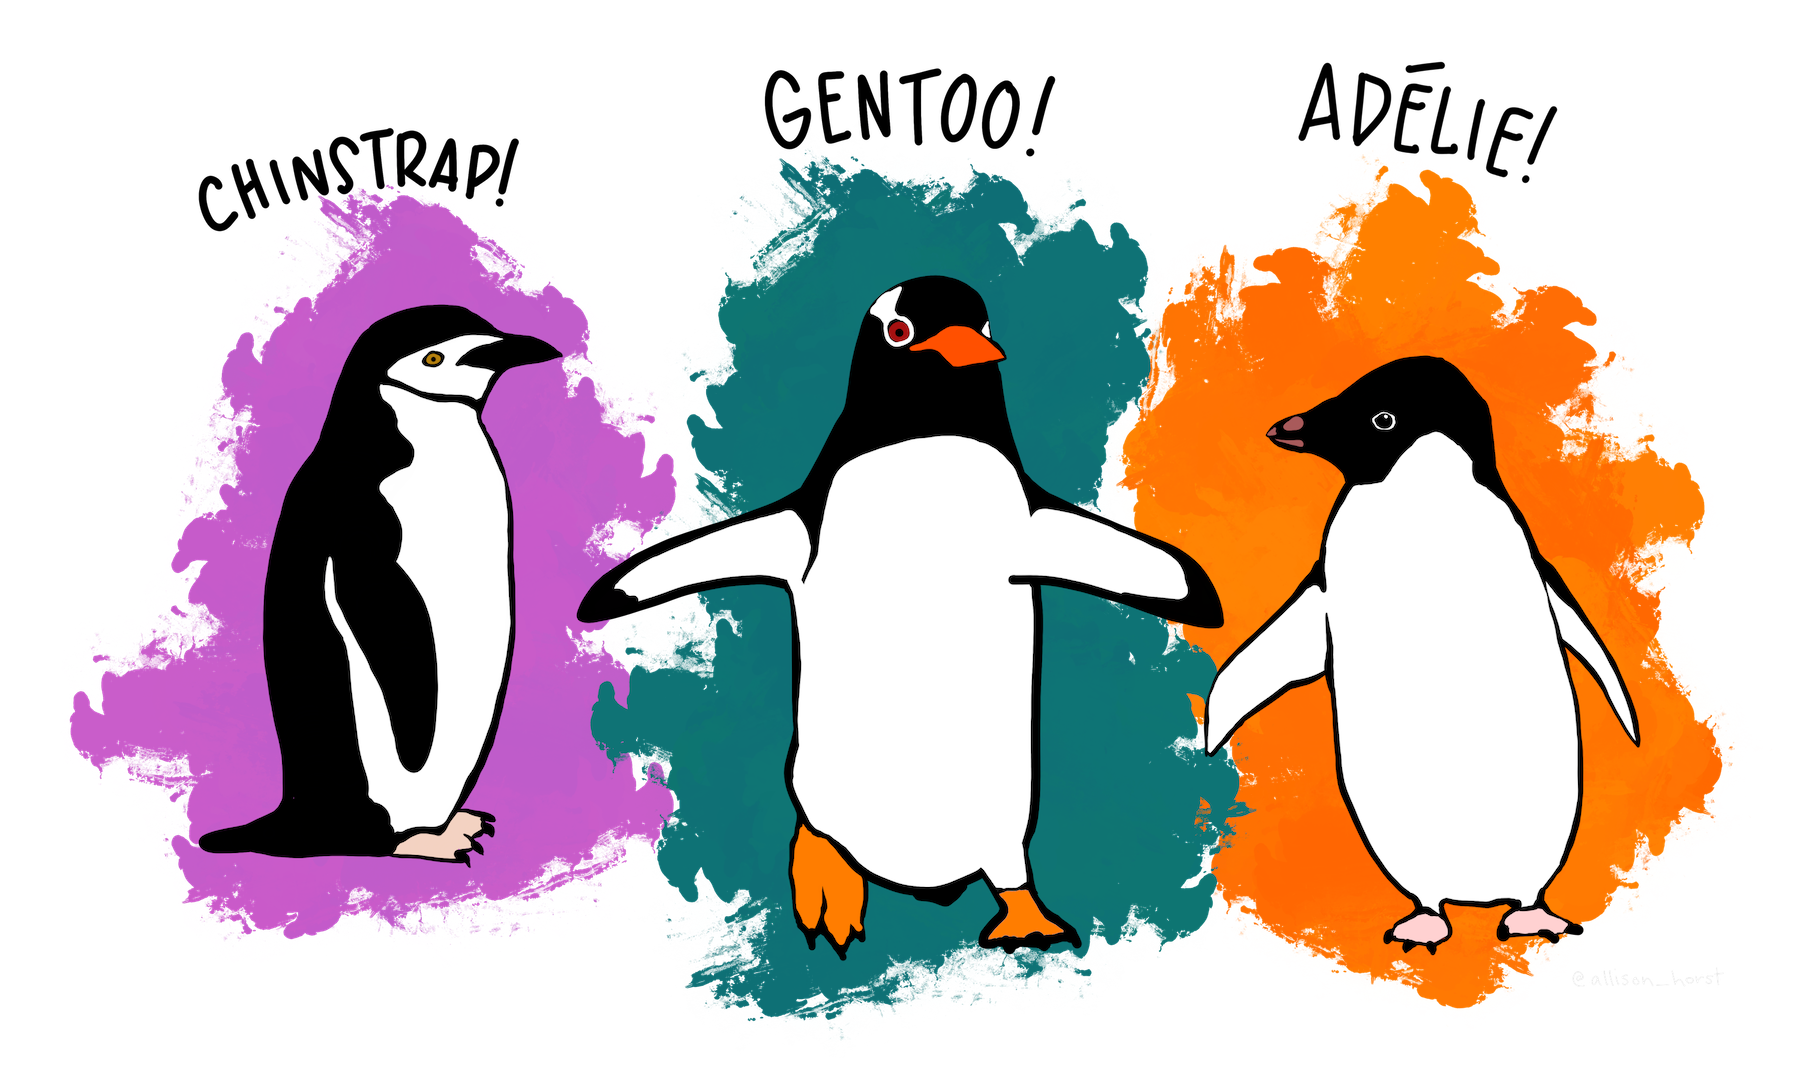

# 1. Introduction: meet the penguins!
The palmerpenguins dataset contains size measurements for three penguin species – Adelie, Chinstrap, and Gentoo – observed on three islands – Torgersen, Dream, and Biscoe – in the Palmer Archipelago, Antarctica. 
The data were collected from 2007 to 2009 by Dr. Kristen Gorman with the Palmer Station Long Term Ecological Research Program, part of the US Long Term Ecological Research Network.

Data from: https://github.com/mcnakhaee/palmerpenguins

In [14]:
import pandas as pd
import seaborn as sns 
from palmerpenguins import load_penguins
sns.set_style('whitegrid')
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


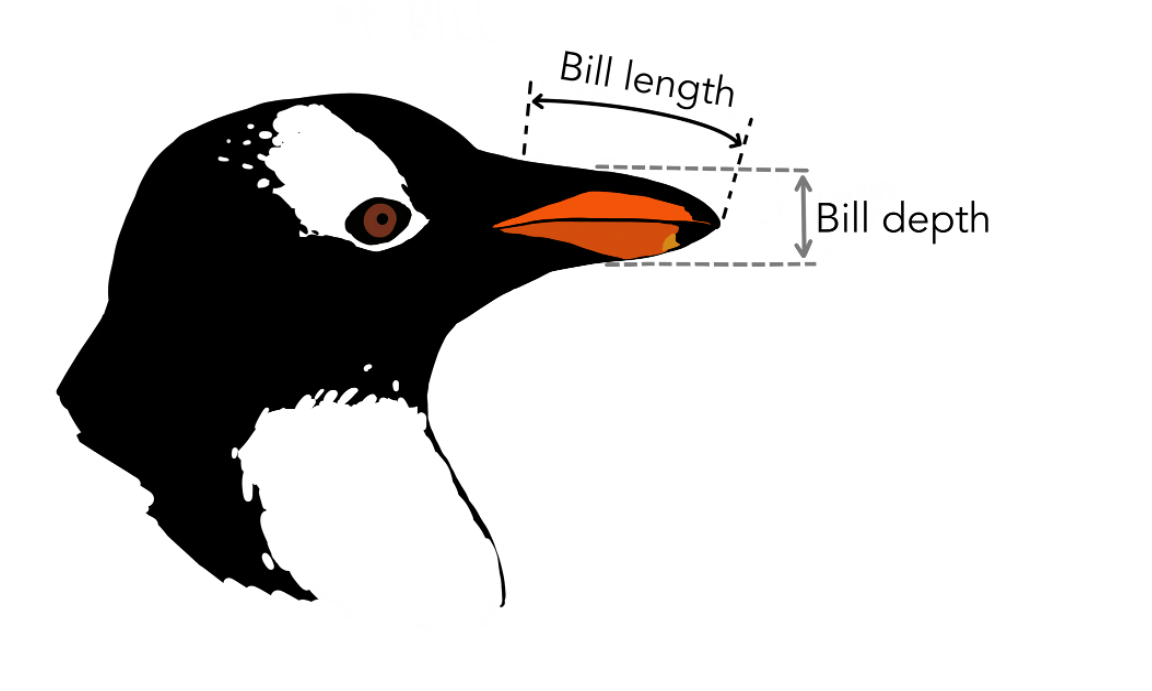

In [15]:
from IPython.display import Image
Image(filename = "Penguin1.png", width = 500, height = 500)

# 2. Overview of dataset 
Let's take a look at some of the characteristics of the Palmer penguin population.

## 2.1. How many male and female penguins are there? 

In [5]:
penguins["sex"].value_counts(normalize=False) # how many males and females are in our dataset

male      168
female    165
Name: sex, dtype: int64

In [6]:
penguins['sex'].isna().sum() # how many penguins were not assigned a gender

11

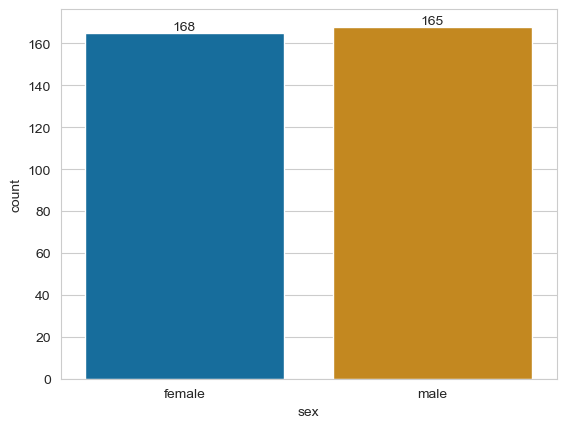

In [7]:
graph = sns.countplot(x=penguins['sex'], order=penguins['sex'].value_counts(ascending=True).index, palette="colorblind")
abs_values = penguins['sex'].value_counts(ascending=False).values
graph.bar_label(container=graph.containers[0], labels=abs_values)
import matplotlib.pyplot as plt
plt.show()

## 2.2. How do population numbers change over the years?

In [8]:
penguins["year"].value_counts(normalize=False) # identify how many datapoints there is per year

2009    120
2008    114
2007    110
Name: year, dtype: int64

In [9]:
penguins['year'].isna().sum() # check whether there are any missing values in the year variable

0

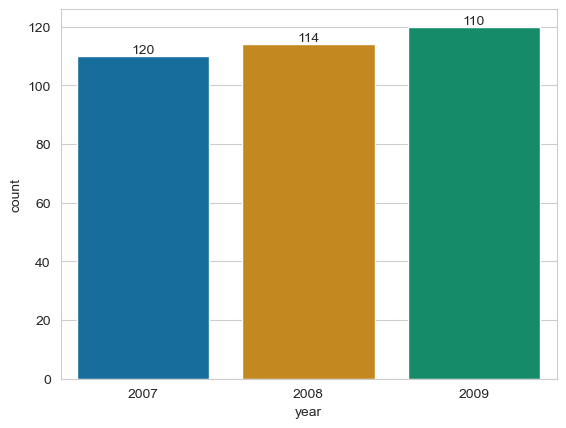

In [10]:
graph = sns.countplot(x=penguins['year'], order=penguins['year'].value_counts(ascending=True).index, palette="colorblind")
abs_values = penguins['year'].value_counts(ascending=False).values
graph.bar_label(container=graph.containers[0], labels=abs_values)
plt.show()

## 2.3. What is the distribution of the different species across the islands?

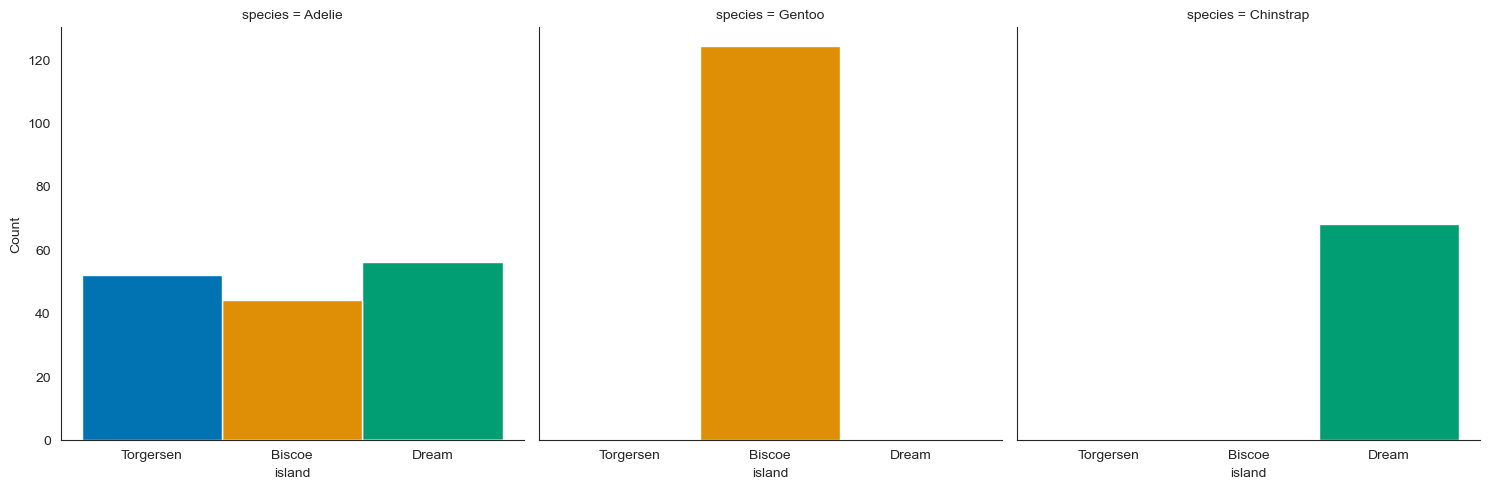

In [143]:
sns.displot(data=penguins, x="island", col="species", hue="island", legend=False, palette="colorblind", alpha=1)
plt.show()

## 2.4. Is there a difference in physical characteristics among the species across the islands?

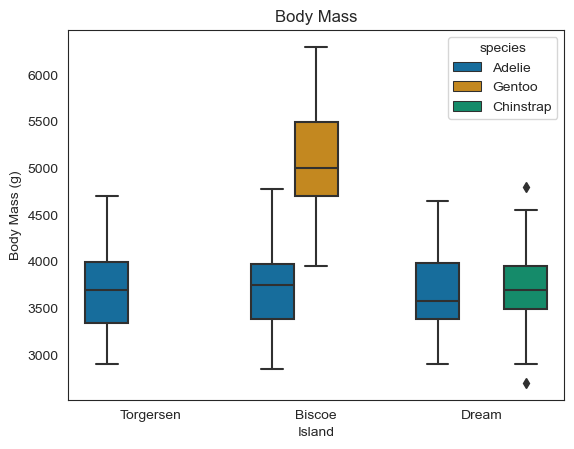

In [144]:
graph = sns.boxplot(data = penguins, x = 'island', y = "body_mass_g", hue = "species", palette="colorblind")
graph.set_xlabel("Island")
graph.set_ylabel("Body Mass (g)")
graph.set_title("Body Mass")
plt.show()

## 2.5. Is there a difference in physical characteristics according to sex and time?

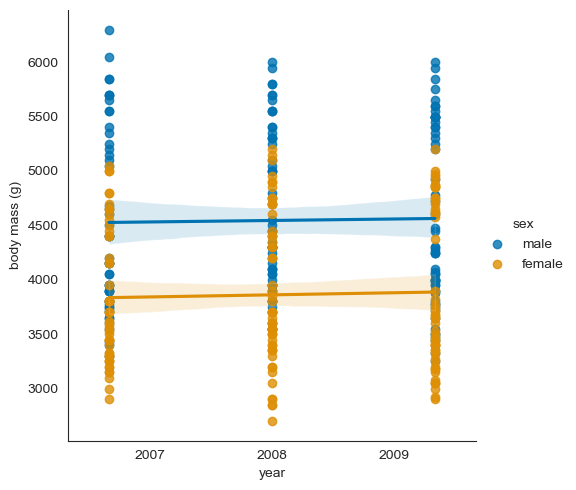

In [147]:
import numpy as np
mass_year = sns.lmplot(x="year", y="body_mass_g", hue="sex", palette = "colorblind", data=penguins)
mass_year.set_axis_labels("year", "body mass (g)")
mass_year.set_xticklabels([" ", " ", "2007", " ", " ", "2008", " ", " ", "2009", " ", " "]) # rename the x-axis ticks 
plt.show()

# 3.  Correlation analyses (aka big boy graphs)

## 3.1. Heatmap

<AxesSubplot:>

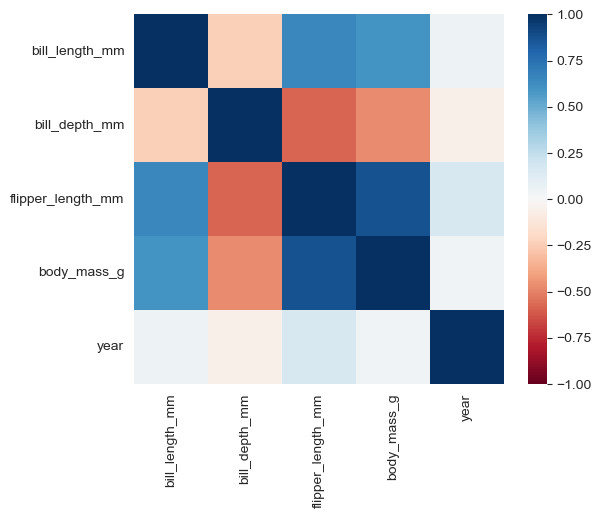

In [136]:
penguins.corr()
corr = penguins.corr()
%matplotlib inline
sns.heatmap(corr, vmin=-1.0, vmax=1.0, square=True, cmap="RdBu")

## 3.2. Multi-variable scatter matrix

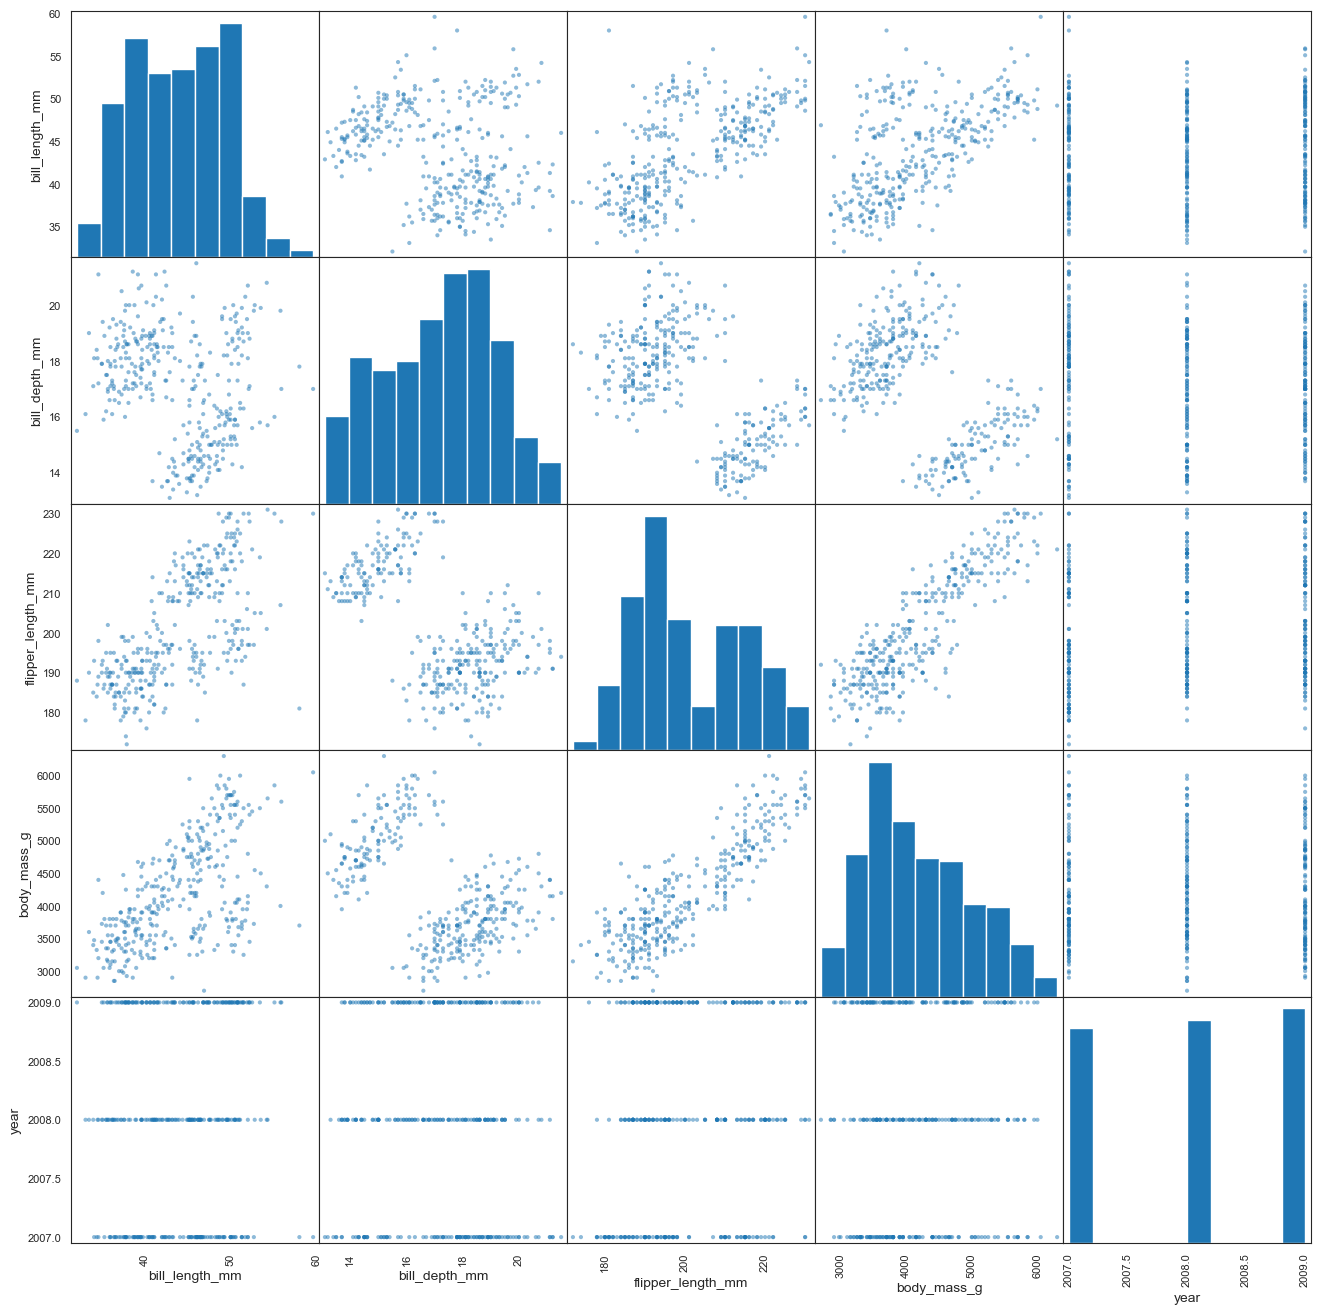

In [138]:
from pandas.plotting import scatter_matrix
scatter_matrix(penguins, figsize=(16, 16)
plt.show()

## 3.3. Linear regression

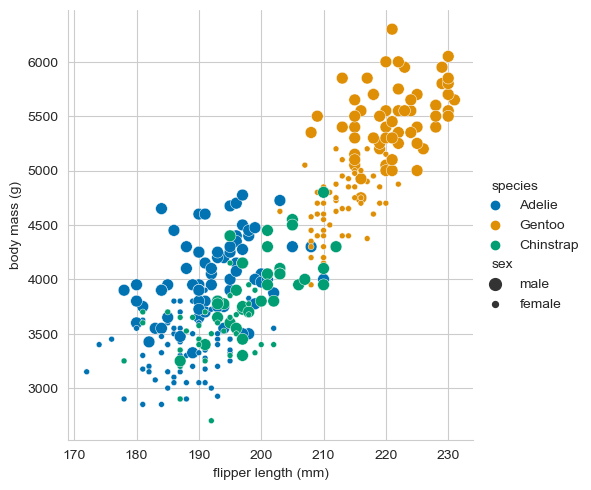

In [57]:
mass_length = sns.relplot(data=penguins, x="flipper_length_mm", y="body_mass_g", hue="species", palette = "colorblind", size = "sex")
mass_length.set_axis_labels("flipper length (mm)", "body mass (g)")
plt.show()

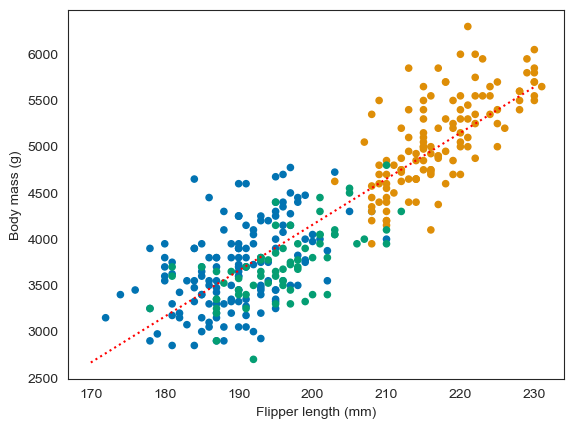

In [162]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

X=penguins[["flipper_length_mm"]]
X_right=X.dropna()
y=penguins["body_mass_g"]
y_right=y.dropna()

model.fit(X_right, y_right)

x_fit = pd.DataFrame({"flipper_length_mm": [170, 230]})
y_pred = model.predict(x_fit)

fig, ax = plt.subplots()
colors={"Adelie":"#0173b2", "Gentoo":"#de8e07", "Chinstrap": "#049e73"}
penguins.plot.scatter("flipper_length_mm", "body_mass_g", ax=ax, c=penguins['species'].map(colors))
ax.plot(x_fit["flipper_length_mm"], y_pred, linestyle=":", color="red")
mass_length.set_axis_labels("flipper length (mm)", "body mass (g)")
plt.xlabel("Flipper length (mm)")
plt.ylabel("Body mass (g)")
plt.show()

## 3.4. K-nearest neighbour analysis

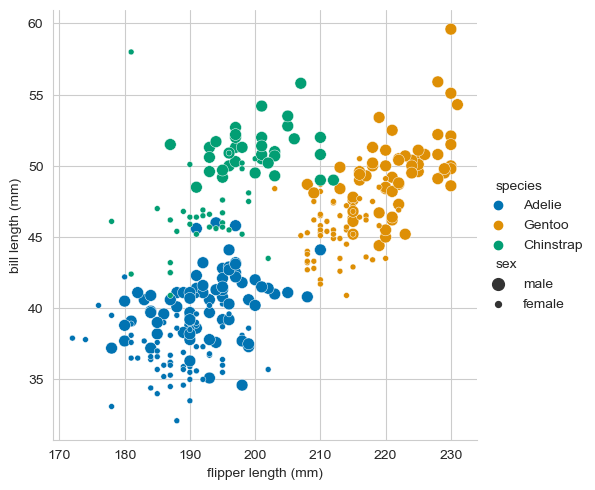

In [58]:
length=sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", palette = "colorblind", size = "sex")
length.set_axis_labels("flipper length (mm)", "bill length (mm)")
plt.show()

In [171]:
penguins.drop(['island','sex'],inplace=True, axis=1),penguins.dropna()
df=penguins.dropna()
y, index = pd.factorize(df['species'])
X = df[["bill_length_mm", "flipper_length_mm"]]

In [172]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

In [173]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_X, train_y)

KNeighborsClassifier()

In [174]:
model.score(test_X, test_y)

/Users/carolinagaudenzi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9534883720930233

In [183]:
def plot_knn(model, X, y, resolution=100, ax=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    if X.shape[1] != 2:
        raise ValueError(f"X must have exactly two features to plot, you passed X.shape={X.shape}")
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)
    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]
    x1_range = np.linspace(x1.min()*1.1 - x1.max()*0.1, x1.max()*1.1 - x1.min()*0.1, resolution)
    x2_range = np.linspace(x2.min()*1.1 - x2.max()*0.1, x2.max()*1.1 - x2.min()*0.1, resolution)
    grid_x1_values, grid_x2_values = np.meshgrid(x1_range, x2_range)
    x_prime = np.column_stack((grid_x1_values.ravel(), grid_x2_values.ravel()))
    x_prime = pd.DataFrame(x_prime, columns=X.columns)
    y_hat = model.predict(x_prime).reshape(grid_x1_values.shape)

    if ax is None:
        fig, ax = plt.subplots()
    ax.pcolormesh(grid_x1_values, grid_x2_values, y_hat, cmap="Pastel2", alpha=1.0, shading="auto")
    X.plot.scatter(0, 1, c=y, colormap="Dark2", colorbar=False, alpha=0.8, ax=ax)

/Users/carolinagaudenzi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


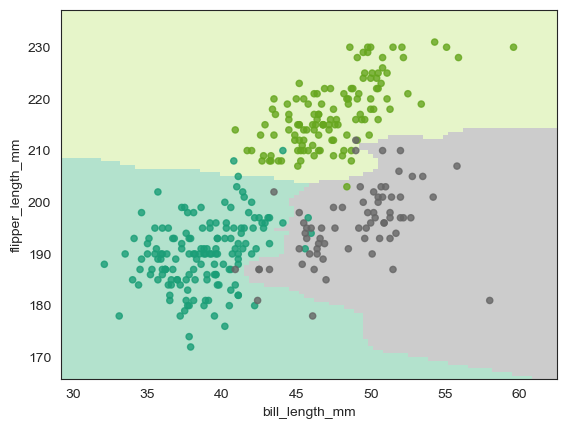

In [184]:
plot_knn(model, X, y)
plt.show()

# 4. Conclusion

Body mass and flipper length have the strongest correlation among all other measured characteristics. 

The variables that can be used to distinguish among the species are bill length and flipper length. These features remained fixed over time, which makes them suitable to determine the species regardless of the year in which the data were collected. 

# Gentoo

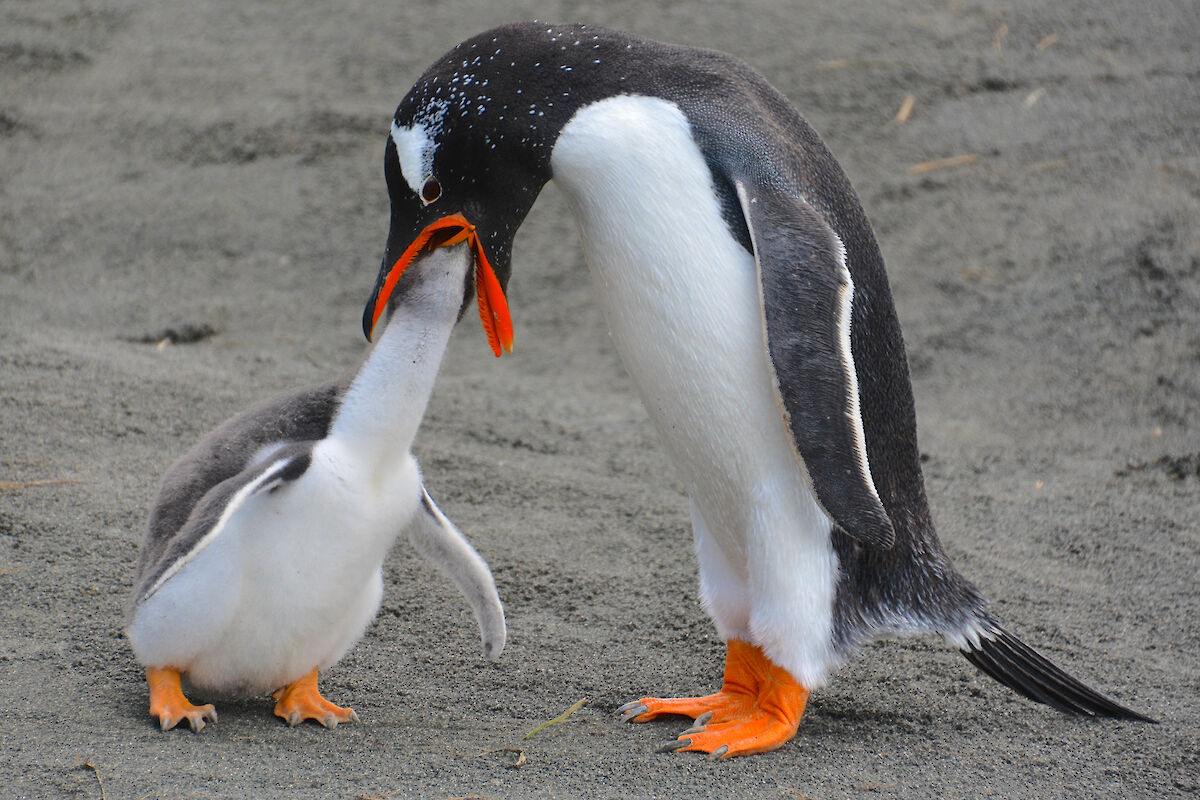

In [19]:
from IPython.display import Image
Image(filename = "Gentoo.jpg", width = 900, height = 900)

# Adelie

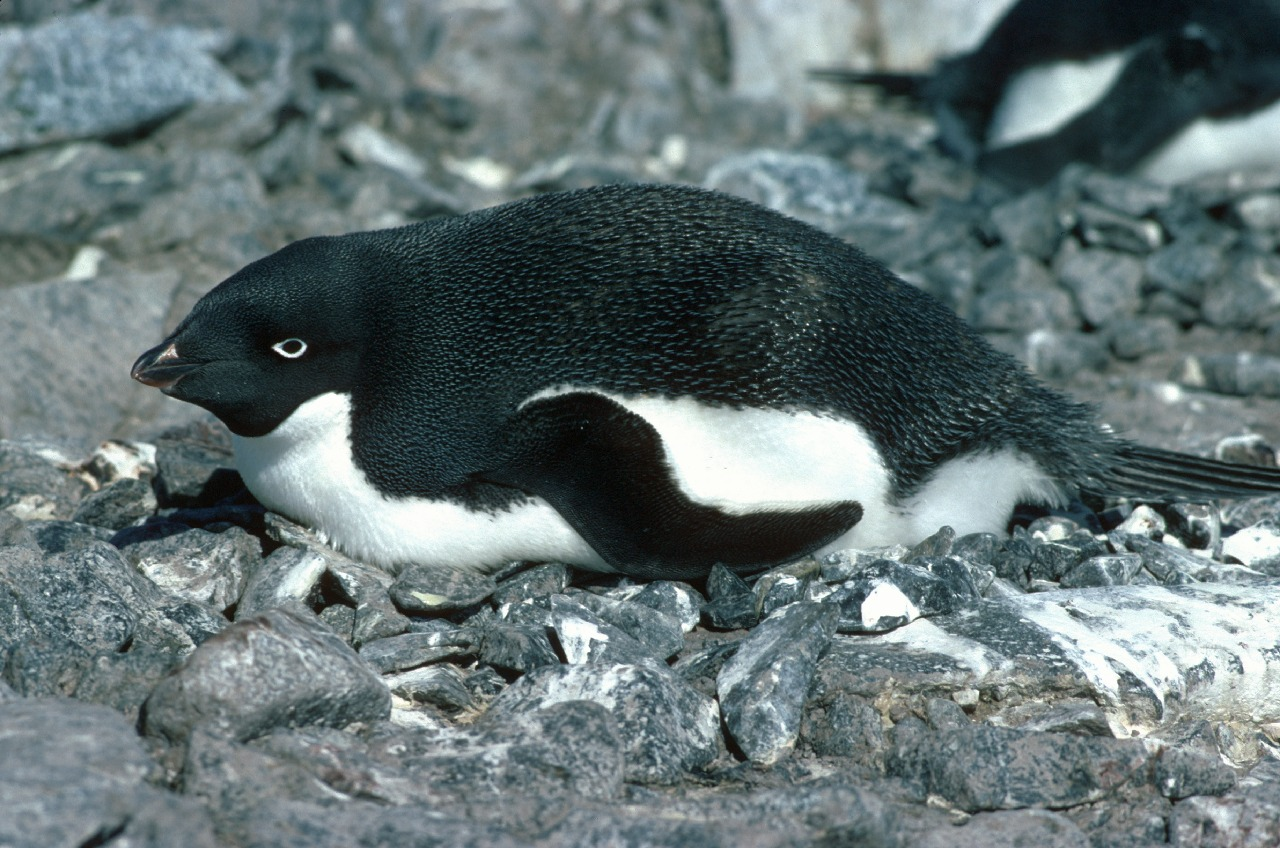

In [21]:
from IPython.display import Image
Image(filename = "Adelie.jpeg", width = 900, height = 900)

# Chinstrap

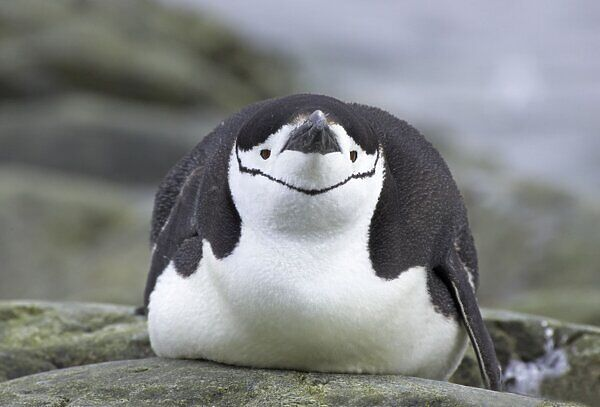

In [25]:
from IPython.display import Image
Image(filename = "Chinstrap.jpg", width = 900, height = 900)